In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import pearsonr

sns.set(style='whitegrid', font_scale=1.2)

In [3]:
df = pd.read_csv('oec.csv')

<h1><b>ANALISI DEGLI ESOPIANETI SCOPERTI TRA IL 1992 E IL 2017</b></h1> 

<h1><b>INTRODUZIONE</b></h1>

##**COSA SONO GLI ESOPIANETI?**
- Sono corpi celesti che orbitano attorno a stelle diverse dal nostro Sole. 
- Le caratteristiche di ciascun esopianeta variano molto da un pianeta all'altro.

##**LE DOMANDE CHE MI SONO POSTA**
- Quanti esopianeti sono stati scoperti ogni anno e con quale metodo?
- In che tipo di sistemi abitano?
- Che caratteristiche hanno rispetto alla Terra?
- Che caratterestiche hanno le stelle attorno alle quali ruotano?

##**IL DATASET**
- Fonte: https://www.kaggle.com/datasets/mrisdal/open-exoplanet-catalogue
- Descrizione: 3582 esopianeti scoperti tra il 1992 e il 2017. 

##**COSTANTI USATE**
- Massa di Giove: 1.8991766e+27 kg
- Massa del Sole: 1.9891e+30 kg
- Raggio di Giove: 69911000 m
- Raggio del Sole: 6.96e+08 m

<h1><b>ANALISI DEI DATI</b></h1>

###**Quanti pianeti sono stati scoperti ogni anno?**

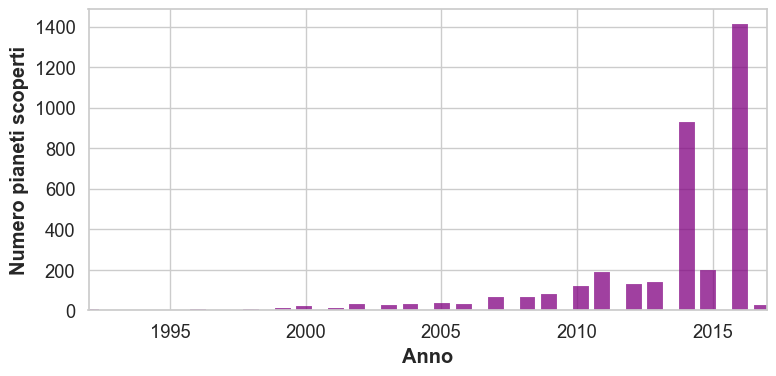

In [19]:
plt.figure(figsize = (8, 4) )
grf = sns.histplot(df["DiscoveryYear"], color='purple', shrink=1.5);
plt.xlim(1992, 2017)
plt.xlabel("Anno", fontweight='bold')
plt.ylabel("Numero pianeti scoperti", fontweight='bold')
plt.tight_layout()

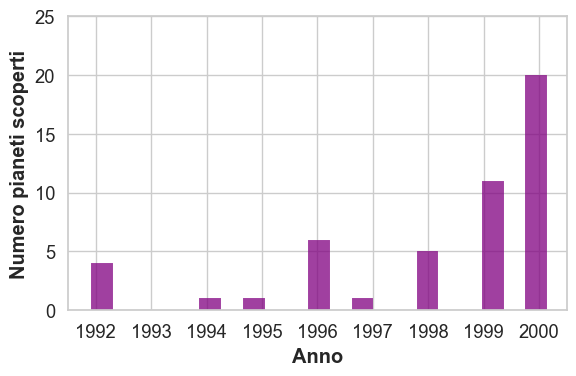

In [18]:
plt.figure(figsize = (6, 4) )
grf = sns.histplot(df["DiscoveryYear"], color='purple', shrink=1);
plt.xlim(1991.5, 2000.5)
plt.ylim(0,25)
plt.xlabel("Anno", fontweight='bold')
plt.ylabel("Numero pianeti scoperti", fontweight='bold')
plt.tight_layout()

###**Quali metodi sono stati utilizzati maggiormente per trovare gli esopianeti?**

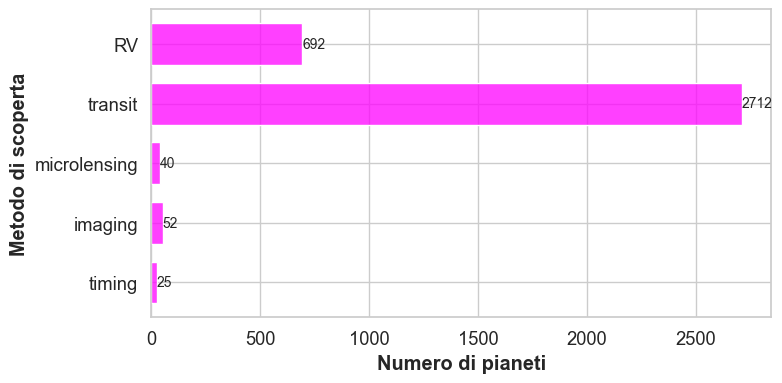

In [20]:
plt.figure(figsize = (8, 4) )
gr = sns.histplot(y=df["DiscoveryMethod"], color="magenta", shrink=0.7);
gr.set_ylabel("Metodo di scoperta", fontweight='bold')
gr.set_xlabel("Numero di pianeti", fontweight='bold')

gr.bar_label(gr.containers[0], fontsize=10);

###**In che periodo sono stati utilizzati i vari metodi?**

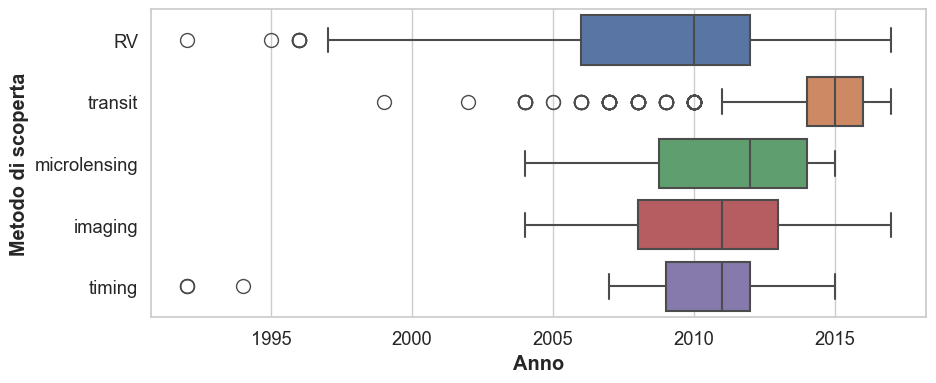

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.xlabel("Anno", fontweight='bold')
plt.ylabel("Metodo di scoperta", fontweight='bold')
sns.boxplot( x="DiscoveryYear", y="DiscoveryMethod", data=df ,linewidth=1.5, fliersize=10, hue="DiscoveryMethod", legend=False );

###**Quali sono i tipi di sistemi più diffusi?**

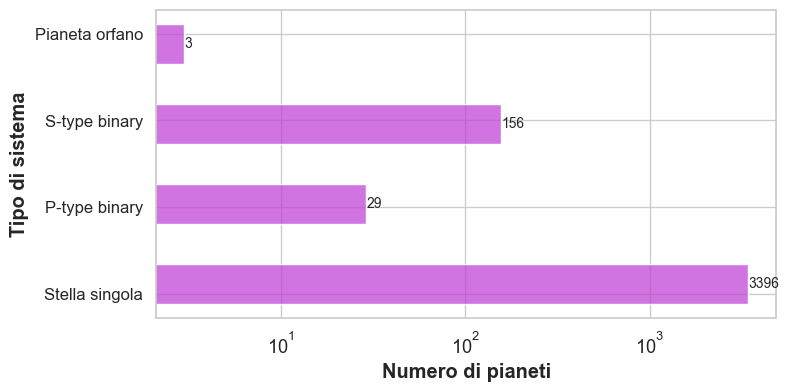

In [15]:
plt.figure(figsize = (8, 4) )
gr = sns.histplot(y=df["TypeFlag"], color="#C045D6", shrink=2);
gr.set_xscale('log')
gr.set_ylabel("Tipo di sistema", fontweight='bold')
gr.set_xlabel("Numero di pianeti", fontweight='bold')
nomi = ["Stella singola", "P-type binary", "S-type binary", "Pianeta orfano"]
plt.yticks(ticks = [0, 1, 2, 3], labels=nomi, fontsize=12 );

gr.bar_label(gr.containers[0], fontsize=10);

###**Grandezza degli esopianeti rispetto al tipo di sistema**
- Raggio di Giove: 69911000 m
- Raggio della Terra: 6378000 m
- Terra/Giove: 0,09

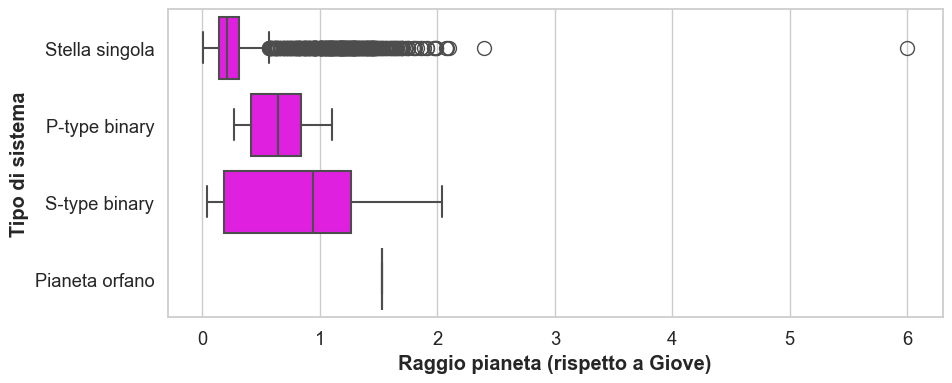

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
tf = sns.boxplot( x="RadiusJpt", y="TypeFlag", data=df ,linewidth=1.5, fliersize=10, orient='h', color="magenta");
nomi = ["Stella singola", "P-type binary", "S-type binary", "Pianeta orfano"]
plt.yticks(ticks = [0, 1, 2, 3], labels=nomi )
tf.set_xlabel("Raggio pianeta (rispetto a Giove)", fontweight='bold')
tf.set_ylabel("Tipo di sistema", fontweight='bold');

###**Temperatura degli esopianeti**
- Temperatura superficiale media terrestre: 288 K

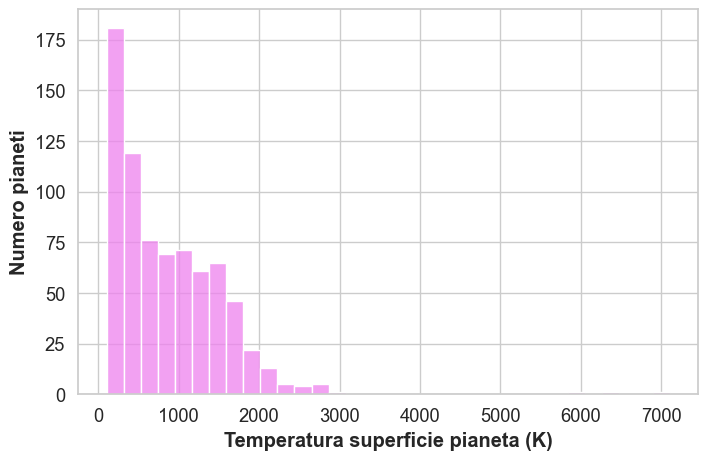

In [26]:
plt.figure(figsize = (8, 5) )
plt.xlabel("Temperatura superficie pianeta (K)", fontweight='bold')
plt.ylabel("Numero pianeti", fontweight='bold')
temp = sns.histplot(df["SurfaceTempK"], color='violet' );

###**Correlazione tra raggio e massa delle stelle**
- Massa del Sole: 1.9891e+30 kg
- Raggio del Sole: 6.96e+08 m

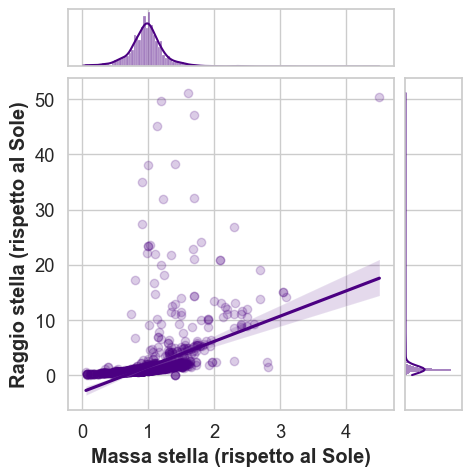

In [24]:
g = sns.jointplot(df, x = "HostStarMassSlrMass", y = "HostStarRadiusSlrRad", kind='reg', height = 5, ratio = 5,
             joint_kws = {'scatter_kws':dict(alpha=0.2)}, color="indigo");
sns.despine(top=False, right=False) 
plt.xlabel("Massa stella (rispetto al Sole)", fontweight='bold')
plt.ylabel("Raggio stella (rispetto al Sole)", fontweight='bold');

###**Correlazione tra massa e temperatura delle stelle**
- Massa del Sole: 1.9891e+30 kg
- Temperatura superficiale solare: 5772 K

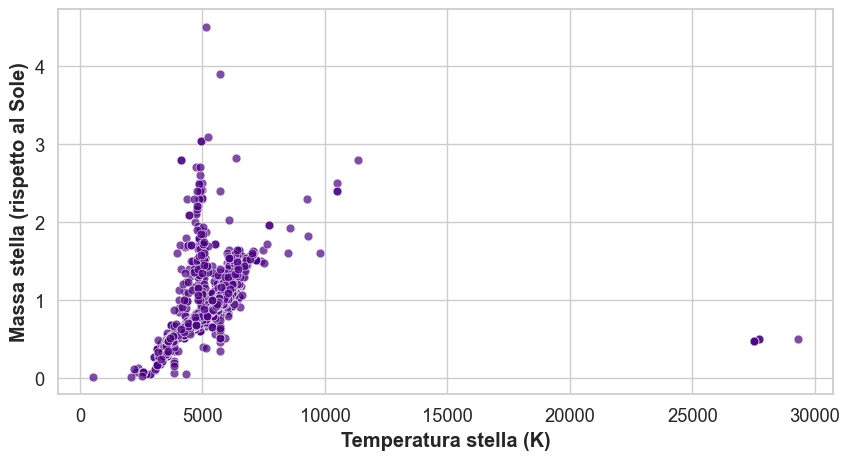

In [4]:
plt.figure(figsize = (10, 5) )
sns.scatterplot( data=df, y="HostStarMassSlrMass", x="HostStarTempK", s=40, alpha=0.7, color="indigo" ); 
#sns.regplot(y="HostStarMassSlrMass", x="HostStarTempK", data=df )
plt.ylabel("Massa stella (rispetto al Sole)",fontweight='bold')
plt.xlabel("Temperatura stella (K)", fontweight='bold');

<h1><b>CONCLUSIONI</b></h1>

- L'anno in cui sono stati individuati più esopianeti è il 2016.
- Il metodo più diffuso per individuarli è il metodo del transito.
- La maggior parte di essi orbita attorno a stelle singole.
- Le caratteristiche degli esopianeti variano enormemente in termini di dimensioni, massa, composizione e orbita.